# Triton work for "NL I09" and each second TestMuh
### target is CHE_FIGN;  is continuos
### is target categorical or conitunuous variable ?????
### what factor affecting target to change
### which object column we need to convert to numbers
### which column we can drop from experience from object or numbers
### we can drop time column
### we have to drop or impute (replace missing values with mean or median) or normalize same as we are doing in our dashboard
### we can drop may be only 5% to 10% data if data set is very large

In [ ]:
# CHE_FIGN
# 0.0    208097
# 1.0        14
# 9.0         1
# Name: CHE_FIGN_1, dtype: int64

In [ ]:
# BLOWRPWM
# CHE_FCDV
# CHE_BPDV
# FLAMETST
# FLAME_ON
# C_HEALTH
# ALARM_01
# ALARM_02
# ALARM_03
# ALARM_04
# FLAMECUR
# FANSPEED
# VLVSTATE
# GASVALVE
# S3_EXPRS
# S2_INPRS
# S1_AIRFL
# TANKTEMP
# CHE_FIGN
# CHE_BMIN
# INLTTEMP

In [1]:
# Required Imports
import glob
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#creating dataframe df1 of "NL I09"
df1 = pd.concat(map(pd.read_csv, glob.glob('data1/*.csv')))

C:\Users\muhammad.tahir.ctr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (2,3,4,5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#readong first 5 rows of "NL I09"
df1.head()

,Time,Date,BLOWRPWM_1,CHE_FCDV_1,CHE_BPDV_1,FLAMETST_1,FLAME_ON_1,C_HEALTH_1,ALARM_01_1,ALARM_02_1,ALARM_03_1,Unnamed: 11
0,12:57:56 PM,9/10/2021,0.0,0,-1,6.4,No,93.4,,,,NaN
1,12:57:57 PM,9/10/2021,0.0,0,-1,6.4,No,93.4,,,,NaN
2,12:57:58 PM,9/10/2021,0.0,0,-1,6.4,No,93.4,,,,NaN
3,12:57:59 PM,9/10/2021,---,---,---,---,---,---,---,---,---,NaN
4,12:58:00 PM,9/10/2021,0.0,0,-1,6.4,No,93.4,,,,NaN


In [4]:
# looking at null values and data types of each column for "NL I09"
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383286 entries, 0 to 31937
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         383286 non-null  object 
 1   Date         383286 non-null  object 
 2   BLOWRPWM_1   383286 non-null  object 
 3   CHE_FCDV_1   383286 non-null  object 
 4   CHE_BPDV_1   383286 non-null  object 
 5   FLAMETST_1   383286 non-null  object 
 6   FLAME_ON_1   383286 non-null  object 
 7   C_HEALTH_1   383286 non-null  object 
 8   ALARM_01_1   383285 non-null  object 
 9   ALARM_02_1   383286 non-null  object 
 10  ALARM_03_1   383286 non-null  object 
 11  Unnamed: 11  0 non-null       float64
dtypes: float64(1), object(11)
memory usage: 38.0+ MB


In [5]:
df1.columns

Index(['Time', 'Date', 'BLOWRPWM_1', 'CHE_FCDV_1', 'CHE_BPDV_1', 'FLAMETST_1',
       'FLAME_ON_1', 'C_HEALTH_1', 'ALARM_01_1', 'ALARM_02_1', 'ALARM_03_1',
       'Unnamed: 11'],
      dtype='object')

In [6]:
df1['date_time'] = df1['Time'] + ' ' + df1['Date']

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383286 entries, 0 to 31937
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         383286 non-null  object 
 1   Date         383286 non-null  object 
 2   BLOWRPWM_1   383286 non-null  object 
 3   CHE_FCDV_1   383286 non-null  object 
 4   CHE_BPDV_1   383286 non-null  object 
 5   FLAMETST_1   383286 non-null  object 
 6   FLAME_ON_1   383286 non-null  object 
 7   C_HEALTH_1   383286 non-null  object 
 8   ALARM_01_1   383285 non-null  object 
 9   ALARM_02_1   383286 non-null  object 
 10  ALARM_03_1   383286 non-null  object 
 11  Unnamed: 11  0 non-null       float64
 12  date_time    383286 non-null  object 
dtypes: float64(1), object(12)
memory usage: 40.9+ MB


In [8]:
df1.head()

,Time,Date,BLOWRPWM_1,CHE_FCDV_1,CHE_BPDV_1,FLAMETST_1,FLAME_ON_1,C_HEALTH_1,ALARM_01_1,ALARM_02_1,ALARM_03_1,Unnamed: 11,date_time
0,12:57:56 PM,9/10/2021,0.0,0,-1,6.4,No,93.4,,,,NaN,12:57:56 PM 9/10/2021
1,12:57:57 PM,9/10/2021,0.0,0,-1,6.4,No,93.4,,,,NaN,12:57:57 PM 9/10/2021
2,12:57:58 PM,9/10/2021,0.0,0,-1,6.4,No,93.4,,,,NaN,12:57:58 PM 9/10/2021
3,12:57:59 PM,9/10/2021,---,---,---,---,---,---,---,---,---,NaN,12:57:59 PM 9/10/2021
4,12:58:00 PM,9/10/2021,0.0,0,-1,6.4,No,93.4,,,,NaN,12:58:00 PM 9/10/2021


In [9]:
df1 = df1.drop(['Time', 'Date', 'Unnamed: 11'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383286 entries, 0 to 31937
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   BLOWRPWM_1  383286 non-null  object
 1   CHE_FCDV_1  383286 non-null  object
 2   CHE_BPDV_1  383286 non-null  object
 3   FLAMETST_1  383286 non-null  object
 4   FLAME_ON_1  383286 non-null  object
 5   C_HEALTH_1  383286 non-null  object
 6   ALARM_01_1  383285 non-null  object
 7   ALARM_02_1  383286 non-null  object
 8   ALARM_03_1  383286 non-null  object
 9   date_time   383286 non-null  object
dtypes: object(10)
memory usage: 32.2+ MB


In [10]:
#creating dataframe df1 of "NL I09"
df2 =  pd.concat(map(pd.read_csv, glob.glob('data2/*.csv')))

In [11]:
df2.head()

,Time,Date,ALARM_04_1,FLAMECUR_1,FANSPEED_1,VLVSTATE_1,GASVALVE_1,S3_EXPRS_1,S2_INPRS_1,S1_AIRFL_1,TANKTEMP_1,CHE_FIGN_1,CHE_BMIN_1,INLTTEMP_1,Unnamed: 14
0,12:55:55 PM,9/10/2021,,0.0,0,Standby,Closed,Closed,Closed,Open,177.9,3230,64151,78.1,NaN
1,12:55:56 PM,9/10/2021,,0.0,0,Standby,Closed,Closed,Closed,Open,177.9,3230,64151,78.1,NaN
2,12:55:57 PM,9/10/2021,,0.0,0,Standby,Closed,Closed,Closed,Open,177.9,3230,64151,78.1,NaN
3,12:55:58 PM,9/10/2021,,0.0,0,Standby,Closed,Closed,Closed,Open,177.9,3230,64151,78.2,NaN
4,12:55:59 PM,9/10/2021,,0.0,0,Standby,Closed,Closed,Closed,Open,177.9,3230,64151,78.2,NaN


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383636 entries, 0 to 31937
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         383636 non-null  object 
 1   Date         383636 non-null  object 
 2   ALARM_04_1   383636 non-null  object 
 3   FLAMECUR_1   383636 non-null  object 
 4   FANSPEED_1   383636 non-null  object 
 5   VLVSTATE_1   383636 non-null  object 
 6   GASVALVE_1   383636 non-null  object 
 7   S3_EXPRS_1   383636 non-null  object 
 8   S2_INPRS_1   383636 non-null  object 
 9   S1_AIRFL_1   383636 non-null  object 
 10  TANKTEMP_1   383636 non-null  object 
 11  CHE_FIGN_1   383636 non-null  object 
 12  CHE_BMIN_1   383636 non-null  object 
 13  INLTTEMP_1   383636 non-null  object 
 14  Unnamed: 14  0 non-null       float64
dtypes: float64(1), object(14)
memory usage: 46.8+ MB


In [13]:
df2['date_time'] = df2['Time'] + ' ' + df2['Date']

In [14]:
df2 = df2.drop(['Time', 'Date', 'Unnamed: 14'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383636 entries, 0 to 31937
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ALARM_04_1  383636 non-null  object
 1   FLAMECUR_1  383636 non-null  object
 2   FANSPEED_1  383636 non-null  object
 3   VLVSTATE_1  383636 non-null  object
 4   GASVALVE_1  383636 non-null  object
 5   S3_EXPRS_1  383636 non-null  object
 6   S2_INPRS_1  383636 non-null  object
 7   S1_AIRFL_1  383636 non-null  object
 8   TANKTEMP_1  383636 non-null  object
 9   CHE_FIGN_1  383636 non-null  object
 10  CHE_BMIN_1  383636 non-null  object
 11  INLTTEMP_1  383636 non-null  object
 12  date_time   383636 non-null  object
dtypes: object(13)
memory usage: 41.0+ MB


In [ ]:
# first combine time and date and then merge on date/time

In [15]:
df3 = df1.merge(df2, on='date_time', how='inner')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383286 entries, 0 to 383285
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   BLOWRPWM_1  383286 non-null  object
 1   CHE_FCDV_1  383286 non-null  object
 2   CHE_BPDV_1  383286 non-null  object
 3   FLAMETST_1  383286 non-null  object
 4   FLAME_ON_1  383286 non-null  object
 5   C_HEALTH_1  383286 non-null  object
 6   ALARM_01_1  383285 non-null  object
 7   ALARM_02_1  383286 non-null  object
 8   ALARM_03_1  383286 non-null  object
 9   date_time   383286 non-null  object
 10  ALARM_04_1  383286 non-null  object
 11  FLAMECUR_1  383286 non-null  object
 12  FANSPEED_1  383286 non-null  object
 13  VLVSTATE_1  383286 non-null  object
 14  GASVALVE_1  383286 non-null  object
 15  S3_EXPRS_1  383286 non-null  object
 16  S2_INPRS_1  383286 non-null  object
 17  S1_AIRFL_1  383286 non-null  object
 18  TANKTEMP_1  383286 non-null  object
 19  CHE_FIGN_1  383286 non-

In [ ]:
#df_final = df3.drop(['Unnamed: 11', 'Unnamed: 14', 'Date_x', 'Date_y'], axis=1)
#df_final.info()

In [16]:
df_final = df3

In [17]:
df_final['BLOWRPWM_1'].value_counts()

---     175166
0.0      88073
68.0     40346
0.0      29743
68.0     13631
         ...  
23.5        15
61.5        11
24.5        11
25.5        10
20.0        10
Name: BLOWRPWM_1, Length: 195, dtype: int64

In [18]:
df_final['BLOWRPWM_1'].unique()

array(['0.0', '---', '26.0', '34.0', '23.0', '26.5', '27.5', '28.0',
       '40.0', '51.0', '62.0', '67.0', '68.0', '68.5', '67.5', '65.0',
       '59.5', '56.5', '53.5', '49.5', '45.5', '42.5', '39.0', '37.0',
       '35.0', '32.0', '29.0', '24.0', '31.0', '25.0', '30.0', '48.0',
       '60.0', '66.5', '61.5', '58.5', '55.0', '52.0', '46.0', '40.5',
       '36.5', '28.5', '27.0', '22.5', '39.5', '50.5', '62.5', '63.0',
       '57.0', '46.5', '43.5', '41.0', '38.5', '35.5', '33.0', '21.0',
       '42.0', '53.0', '64.0', '63.5', '56.0', '52.5', '47.0', '44.0',
       '34.5', '32.5', '61.0', '57.5', '54.5', '51.5', '64.5', '48.5',
       '45.0', '43.0', '36.0', '29.5', '47.5', '66.0', '60.5', '38.0',
       '59.0', '55.5', '22.0', '23.5', '58.0', '54.0', '65.5', '50.0',
       '37.5', '25.5', '44.5', '31.5', '24.5', '41.5', '30.5', '20.0',
       '33.5', '49.0', 0.0, 20.0, 28.0, 29.0, 24.0, 27.5, 33.0, 45.0,
       56.0, 64.0, 67.5, 68.0, 68.5, 66.5, 62.5, 60.5, 57.0, 53.5, 49.5,
       

In [19]:
df_final.drop(df_final[df_final['BLOWRPWM_1']=='---'].index, inplace = True)

In [20]:
#what about dash and other values ?
# remove dashes
# combine any string and numbers
# these are percentages
# higher number means faster speed of the fan

In [44]:
df_final['BLOWRPWM_1'] = df_final['BLOWRPWM_1'].astype(float)

In [45]:
df_final['BLOWRPWM_1'].dtype

dtype('float64')

In [46]:
df_final['CHE_FCDV_1'].value_counts()

0     207663
54       457
Name: CHE_FCDV_1, dtype: int64

In [47]:
df_final['CHE_FCDV_1'].unique()

array([ 0, 54], dtype=int64)

In [48]:
df_final['CHE_FCDV_1'].dtype

dtype('int64')

In [23]:
# to change labels of "CHE_FCDV_1"

CHE_FCDV_1_dict = {
    '0': 0,
    0: 0,
    '54': 54
}

df_final["CHE_FCDV_1"] = df_final["CHE_FCDV_1"].map(CHE_FCDV_1_dict)

In [ ]:
#what about dash and other values ?
# remove dashes
# keep zero and 54 , keep betweem 0 and 100

In [24]:
df_final['CHE_BPDV_1'].value_counts()

-1    123822
-1     43056
0      31496
0       9746
Name: CHE_BPDV_1, dtype: int64

In [25]:
df_final['CHE_BPDV_1'].unique()

array(['-1', '0', -1, 0], dtype=object)

In [26]:
# to change labels of "CHE_BPDV_1"

CHE_BPDV_1_dict = {
    '-1': -1,
    -1: -1,
    0: 0,
    '0': 0
}

df_final["CHE_BPDV_1"] = df_final["CHE_BPDV_1"].map(CHE_BPDV_1_dict)

In [27]:
#what about dash and other values ?
# remove dashes
# 0 and -1 percentages values
# blower deviation

In [28]:
df_final['CHE_BPDV_1'].unique()

array([-1,  0], dtype=int64)

In [49]:
df_final['CHE_BPDV_1'].dtype

dtype('int64')

In [30]:
df_final['FLAMETST_1'].value_counts()

6.4    54849
6.2    24698
6.3    22049
6.5    20116
6.4    18444
6.6    13810
6.5    10692
6.3     9370
6.9     7496
6.6     6025
6.8     3307
6.8     2775
6.2     2446
7.0     2140
6.7     2068
7.1     1109
7.0     1095
6.7     1068
7.2     1043
0.9      866
1.8      450
1.1      447
3.1      447
3.3      444
1.0      440
3.8      425
0.0        1
Name: FLAMETST_1, dtype: int64

In [31]:
df_final['FLAMETST_1'].unique()

array(['6.4', '6.5', '6.7', '6.9', '6.6', '3.8', '0.9', '6.2', '0.0',
       '7.1', '6.3', '6.8', '3.3', '7.0', '1.1', '1.8', '7.2', 6.8, 6.2,
       6.4, 6.3, 6.6, 6.5, 6.7, 7.0, 1.0, 3.1], dtype=object)

In [34]:
df_final['FLAMETST_1'] = df_final['FLAMETST_1'].astype(float)

In [35]:
df_final['FLAMETST_1'].dtype

dtype('float64')

In [ ]:
#what about dash and other values ?
# remove dashes
# others are good between 0 and 10

In [50]:
#FLAME_ON_1
df_final['FLAME_ON_1'].unique()

array([ 0.,  1., nan])

In [37]:
df_final['FLAME_ON_1'].value_counts()

No        125434
Yes        82685
Closed         1
Name: FLAME_ON_1, dtype: int64

In [38]:
# to change labels of "FLAME_ON_1"

FLAME_ON_1_dict = {
    'No': 0,

    'Yes': 1
}

df_final["FLAME_ON_1"] = df_final["FLAME_ON_1"].map(FLAME_ON_1_dict)

In [51]:
df_final['FLAME_ON_1'].value_counts()

0.0    125434
1.0     82685
Name: FLAME_ON_1, dtype: int64

In [ ]:
#what about dash and other values ?
# remove dashes
# yes is 1 and no is zero
# drop close values

In [105]:
#C_HEALTH_1
df_final['C_HEALTH_1'].unique()

array([93.4, 94.1, 95.4, 94.6, 94. , 94.3, 94.9, 95.6, 93.5, 96.1, 92.8,
       92. , 95.5, 93.6, 93.1, 92.9, 96. , 97.6, 96.8, 95.3,  0. , 96.4,
       94.4, 94.8, 93. , 95. , 93.8, 96.3, 95.9, 96.6, 96.9, 97.4, 96.5,
       98. , 81.1])

In [104]:
df_final['C_HEALTH_1'] = df_final['C_HEALTH_1'].astype(float)

In [106]:
df_final['C_HEALTH_1'].value_counts()

94.6    27445
95.4    25542
95.9    15082
96.0    14983
95.3    13646
93.5    10392
96.1     9766
94.1     9544
94.8     8632
95.5     8420
96.6     7639
94.0     6504
96.3     6500
96.9     6443
93.4     5747
95.6     5432
94.9     4208
95.0     3244
94.3     3230
94.4     2140
96.8     2119
92.0     2093
92.8     2082
97.4     1089
98.0     1085
93.0     1058
93.6     1043
96.5     1042
96.4     1032
81.1      457
97.6      403
93.8       39
93.1       22
92.9        9
0.0         1
Name: C_HEALTH_1, dtype: int64

In [ ]:
#what about dash and other values ?
# remove dashes
# 0 and 100 fine below 70 triger alarm but above 70 is good and no alarm

In [54]:
df_final['ALARM_01_1'].unique()

array(['                                                ',
       'T114 Flame Rod Degraded and Needs Servicing     ', nan,
       'T113 Flame Rod Degraded and Needs Servicing     '], dtype=object)

In [ ]:
#what about dash and other values ?
# remove dashes

In [55]:
# to change labels of "ALARM_01"

ALARM_01_dict = {
    'nan': 'nan',
    '                                                ': "no_alarm",
    'T113 Flame Rod Degraded and Needs Servicing     ': 'T113 Flame Rod Degraded and Needs Servicing',
    'T114 Flame Rod Degraded and Needs Servicing     ': 'T114 Flame Rod Degraded and Needs Servicing',
}

df_final["ALARM_01_1"] = df_final["ALARM_01_1"].map(ALARM_01_dict)

In [57]:
df_final['ALARM_01_1'].value_counts()

no_alarm                                       205918
T113 Flame Rod Degraded and Needs Servicing      1335
T114 Flame Rod Degraded and Needs Servicing       866
Name: ALARM_01_1, dtype: int64

In [58]:
df_final['ALARM_02_1'].unique()

array(['                                                ',
       '\x01\x06Open  \x07€'], dtype=object)

In [59]:
# to change labels of "ALARM_02"

ALARM_02_dict = {
    '                                                ': "no_alarm"
}

df_final["ALARM_02_1"] = df_final["ALARM_02_1"].map(ALARM_02_dict)

In [60]:
df_final['ALARM_02_1'].value_counts()

no_alarm    208119
Name: ALARM_02_1, dtype: int64

In [ ]:
# remove dashes
# remove 4 values
# empty means "no alarm"

In [ ]:
# flame on closed and test alarm 2 and 3 if values are in same row
# if happen in same row then 

# what is huge data is coming before 

In [61]:
df_final['ALARM_03_1'].unique()

array(['                                                ', 'C333\x07€'],
      dtype=object)

In [62]:
# to change labels of "ALARM_03"

ALARM_03_dict = {
    '                                                ': "no_alarm"
}

df_final["ALARM_03_1"] = df_final["ALARM_03_1"].map(ALARM_03_dict)

In [63]:
df_final['ALARM_03_1'].value_counts()

no_alarm    208119
Name: ALARM_03_1, dtype: int64

In [64]:
df_final['ALARM_04_1'].unique()

array(['                                                ', '---'],
      dtype=object)

In [65]:
# to change labels of "ALARM_04"

ALARM_04_dict = {
    '                                                ': "no_alarm"
}

df_final["ALARM_04_1"] = df_final["ALARM_04_1"].map(ALARM_04_dict)

In [66]:
df_final['ALARM_04_1'].value_counts()

no_alarm    208113
Name: ALARM_04_1, dtype: int64

In [71]:
#FLAMECUR_1
df_final['FLAMECUR_1'].unique()

array(['0.0', '4.1', '3.3', '4.8', '5.2', '5.4', '5.5', '5.6', '5.7',
       '5.8', '5.9', '6.0', '6.2', '6.1', '6.4', '6.3', '2.9', '3.2',
       '3.5', '4.4', '5.0', '5.3', '1.5', '4.0', '1.1', '2.5', '3.4',
       '4.3', '6.5', '0.7', '3.6', '3.8', '3.7', '3.9', '3.1', '4.5',
       '6.7', '1.0', '4.7', '0.4', '0.5', '0.9', '5.1', '0.3', '0.8',
       '6.9', '6.6', '2.3', '2.7', '2.8', '0.6', '2.4', '4.6', '1.7',
       '1.4', '4.9', '1.8', '3.0', '4.2', '2.2', '2.1', '1.2', '1.9',
       '2.6', '1.3', '7.1', '1.6', '6.8', '7.0', '7.2', 5.7, 5.9, 5.6,
       5.8, 6.0, 6.1, 6.2, 6.4, 6.3, 0.9, 0.0, 1.4, 3.8, 2.6, 2.4, 3.7,
       4.7, 5.2, 5.4, 5.5, 6.5, 4.1, 3.0, 3.1, 4.0, 4.8, 0.4, 2.8, 3.2,
       4.6, 5.1, 6.6, 0.6, 0.7, 1.0, 0.8, 2.5, 2.9, 3.4, 4.2, 0.5, 3.6,
       5.3, 1.3, 4.5, 3.5, 4.4, 5.0, 2.7, 3.3, 2.0, 3.9, 4.3, 4.9, 1.7,
       1.6, 1.5, 2.1, 6.8], dtype=object)

In [70]:
# keep any values and keep them for flames current and flame test
df_final.drop(df_final[df_final['FLAMECUR_1']=='---'].index, inplace = True)

In [74]:
#FLAMECUR_1
df_final['FLAMECUR_1'].dtype

dtype('float64')

In [73]:
df_final['FLAMECUR_1'] = df_final['FLAMECUR_1'].astype(float)

In [ ]:
# remove dashes for all
# between zero and 10

In [75]:
df_final['FANSPEED_1'].unique()

array(['0', '1219', '4322', ..., 3650, 3367, 3207], dtype=object)

In [ ]:
#df_final.drop(df_final[df_final['FANSPEED_1']=='...'].index, inplace = True)

In [81]:
df_final['FANSPEED_1'].dtype

dtype('int32')

In [80]:
df_final['FANSPEED_1'] = df_final['FANSPEED_1'].astype(int)

In [82]:
#VLVSTATE_1
df_final['VLVSTATE_1'].value_counts()

Standby       117802
Heating        81599
Pre-Purge       4181
Post-Purge      3159
Ignition        1132
Retry            240
Name: VLVSTATE_1, dtype: int64

In [146]:
df_final['VLVSTATE_1'].unique()

array([2, 3, 4, 5, 6, 7], dtype=int64)

In [ ]:
# Standby       == 2
# Heating = 5
# Pre-Purge = 3
# Post-Purge = 6
# Ignition = 4
# Retry = 7

In [145]:
# to change labels of "GASVALVE_1"

VLVSTATE_1_dict = {
    'Standby': 2,
    'Pre-Purge': 3,
    'Ignition': 4,
    'Heating': 5,
    'Retry': 7,
    'Post-Purge': 6
}

df_final['VLVSTATE_1'] = df_final['VLVSTATE_1'].map(VLVSTATE_1_dict)

In [83]:
#GASVALVE_1
df_final['GASVALVE_1'].value_counts()

Closed    125388
Open       82725
Name: GASVALVE_1, dtype: int64

In [84]:
# to change labels of "GASVALVE_1"

GASVALVE_dict = {
    'Closed': 0,
    
    'Open': 1
}

df_final["GASVALVE_1"] = df_final["GASVALVE_1"].map(GASVALVE_dict)

In [ ]:
# remove dashes
# open close means 0 and 1

In [85]:
#S3_EXPRS_1
df_final['S3_EXPRS_1'].value_counts()

Closed    208111
Open           2
Name: S3_EXPRS_1, dtype: int64

In [86]:
# to change labels of "S2_INPRS"

S3_EXPRS_dict = {
    'Closed': 0,
    
    'Open': 1
}

df_final["S3_EXPRS_1"] = df_final["S3_EXPRS_1"].map(S3_EXPRS_dict)

In [87]:
#S2_INPRS_1
df_final['S2_INPRS_1'].value_counts()

Closed    208111
Open           2
Name: S2_INPRS_1, dtype: int64

In [88]:
# to change labels of "S2_INPRS"

S2_INPRS_dict = {
    'Closed': 0,
    
    'Open': 1
}

df_final["S2_INPRS_1"] = df_final["S2_INPRS_1"].map(S2_INPRS_dict)

In [89]:
#S1_AIRFL_1
df_final['S1_AIRFL_1'].value_counts()

Open      118028
Closed     90085
Name: S1_AIRFL_1, dtype: int64

In [90]:
# to change labels of "S1_AIRFL"

S1_AIRFL_dict = {
    'Closed': 0,
    'Open': 1
}

df_final["S1_AIRFL_1"] = df_final["S1_AIRFL_1"].map(S1_AIRFL_dict)

In [91]:
df_final['S1_AIRFL_1'].value_counts()

1    118028
0     90085
Name: S1_AIRFL_1, dtype: int64

In [92]:
#TANKTEMP_1
df_final['TANKTEMP_1'].value_counts()

183.4    2078
183.5    2035
183.3    2013
183.8    1994
183.9    1988
         ... 
162.2      10
165.7      10
143.1       9
184.8       4
184.7       3
Name: TANKTEMP_1, Length: 846, dtype: int64

In [93]:
df_final.drop(df_final[df_final['TANKTEMP_1']=='---'].index, inplace = True)

In [114]:
df_final['TANKTEMP_1'] = df_final['TANKTEMP_1'].astype(float)

In [149]:
# df_final['TANKTEMP_1'].min()

141.6

In [95]:
#CHE_FIGN_1
df_final['CHE_FIGN_1'].value_counts()

3248    44287
3247    40630
3251    27158
3253    18023
3234    15674
3252     9734
3232     9391
3250     6475
3245     6424
3246     6409
3233     5224
3244     4222
3231     4188
3251     4181
3230     3524
3249     2166
3243      403
Name: CHE_FIGN_1, dtype: int64

In [96]:
df_final.drop(df_final[df_final['CHE_FIGN_1']=='---'].index, inplace = True)

In [112]:
df_final['CHE_FIGN_1'] = df_final['CHE_FIGN_1'].astype(int)

In [153]:
df_final['CHE_FIGN_1'].unique()

array([nan,  0.,  1.,  9.])

In [159]:
df_final['CHE_FIGN_1'].value_counts()

0.0    208097
1.0        14
9.0         1
Name: CHE_FIGN_1, dtype: int64

In [ ]:
# what is 9 == 

In [97]:
#CHE_BMIN_1
df_final['CHE_BMIN_1'].value_counts()

65864    761
66476    759
66434    754
65823    753
65878    749
        ... 
64279     55
65932     36
66656     36
65931     25
66656     23
Name: CHE_BMIN_1, Length: 1368, dtype: int64

In [98]:
df_final.drop(df_final[df_final['CHE_BMIN_1']=='---'].index, inplace = True)

In [110]:
df_final['CHE_BMIN_1'] = df_final['CHE_BMIN_1'].astype(int)

In [155]:
#df_final['CHE_BMIN_1'].max()

1349.0

In [99]:
# INLTTEMP_1
df_final['INLTTEMP_1'].value_counts()

79.2    3097
80.2    2986
79.3    2731
79.1    2691
80.3    2679
        ... 
50.7       7
50.4       7
50.6       6
50.6       4
50.5       3
Name: INLTTEMP_1, Length: 652, dtype: int64

In [100]:
df_final.drop(df_final[df_final['INLTTEMP_1']=='---'].index, inplace = True)

In [108]:
df_final['INLTTEMP_1'] = df_final['INLTTEMP_1'].astype(float)

In [137]:
df_final['CHE_FIGN_1'] = df_final['CHE_FIGN_1'].diff()

In [158]:
#df_final['CHE_FIGN_1'].unique()

array([nan,  0.,  1.,  9.])

In [ ]:
# what is nine then ???????

In [138]:
df_final['CHE_BMIN_1'] = df_final['CHE_BMIN_1'].diff()

In [139]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208113 entries, 0 to 383285
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BLOWRPWM_1  208113 non-null  float64
 1   CHE_FCDV_1  208113 non-null  int64  
 2   CHE_BPDV_1  208113 non-null  int64  
 3   FLAMETST_1  208113 non-null  float64
 4   FLAME_ON_1  208112 non-null  float64
 5   C_HEALTH_1  208113 non-null  float64
 6   ALARM_01_1  208112 non-null  object 
 7   ALARM_02_1  208112 non-null  object 
 8   ALARM_03_1  208112 non-null  object 
 9   date_time   208113 non-null  object 
 10  ALARM_04_1  208113 non-null  object 
 11  FLAMECUR_1  208113 non-null  float64
 12  FANSPEED_1  208113 non-null  int32  
 13  VLVSTATE_1  208113 non-null  object 
 14  GASVALVE_1  208113 non-null  int64  
 15  S3_EXPRS_1  208113 non-null  int64  
 16  S2_INPRS_1  208113 non-null  int64  
 17  S1_AIRFL_1  208113 non-null  int64  
 18  TANKTEMP_1  208113 non-null  float64
 19  CH

In [140]:
df_final.isnull().sum()

BLOWRPWM_1    0
CHE_FCDV_1    0
CHE_BPDV_1    0
FLAMETST_1    0
FLAME_ON_1    1
C_HEALTH_1    0
ALARM_01_1    1
ALARM_02_1    1
ALARM_03_1    1
date_time     0
ALARM_04_1    0
FLAMECUR_1    0
FANSPEED_1    0
VLVSTATE_1    0
GASVALVE_1    0
S3_EXPRS_1    0
S2_INPRS_1    0
S1_AIRFL_1    0
TANKTEMP_1    0
CHE_FIGN_1    1
CHE_BMIN_1    1
INLTTEMP_1    0
dtype: int64

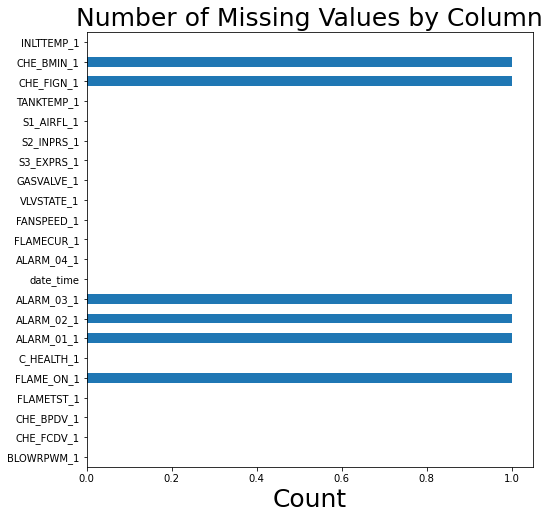

In [141]:
# bar chart to see missing visual in df_data
plt.figure(figsize = (8,8))

df_final.isnull().sum().plot(kind = 'barh')
plt.title('Number of Missing Values by Column', size = 25)
plt.xlabel('Count', size = 25);

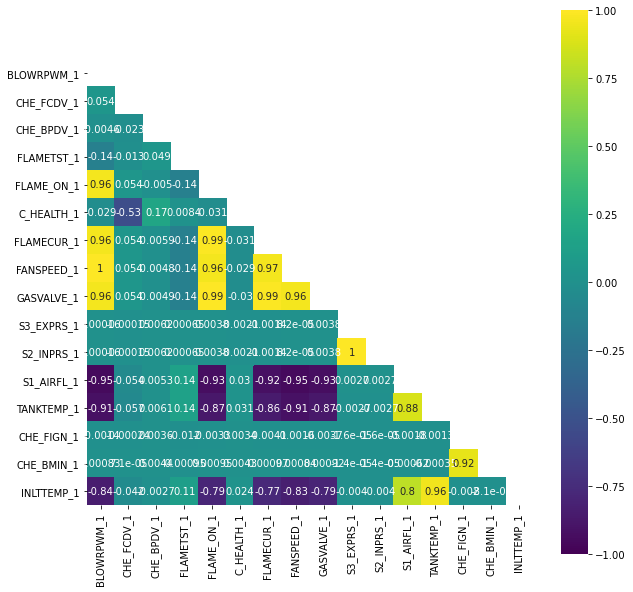

In [142]:
#visual of correlation between fields or columns
plt.figure(figsize=(10, 10))
mask = np.zeros_like(df_final.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_final.corr(), mask = mask, square = True, cmap = 'viridis', annot = True, vmin=-1, vmax=1);
#sns.heatmap(df_final.corr(), annot = True, vmin=-1, vmax=1, center= 0);

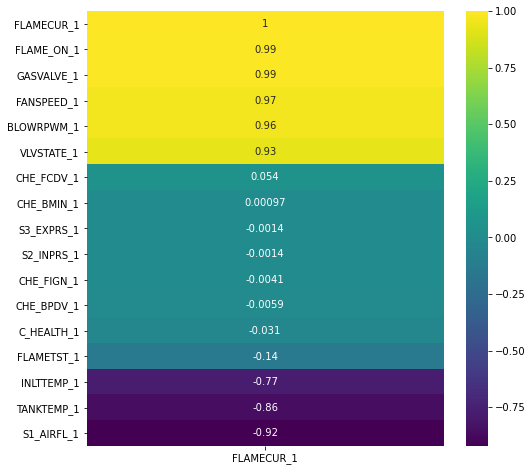

In [147]:
#visual of correlation between fields or columns
plt.figure(figsize=(8,8))

sns.heatmap(df_final.corr()[['FLAMECUR_1']].sort_values('FLAMECUR_1', ascending=False), annot=True, cmap='viridis');

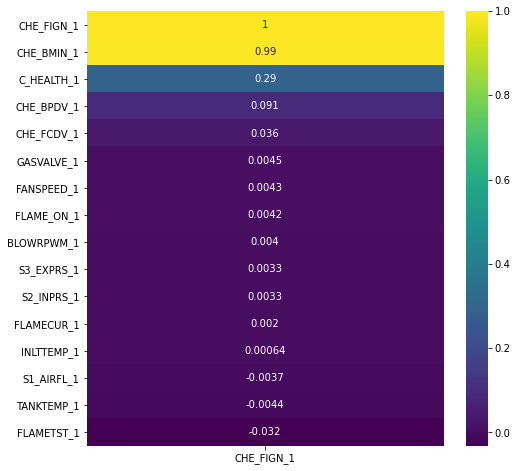

In [136]:
#visual of correlation between fields or columns
plt.figure(figsize=(8,8))

sns.heatmap(df3.corr()[['CHE_FIGN_1']].sort_values('CHE_FIGN_1', ascending=False), annot=True, cmap='viridis');

In [122]:
#numeric data from df_data
df_numeric = df_final._get_numeric_data()

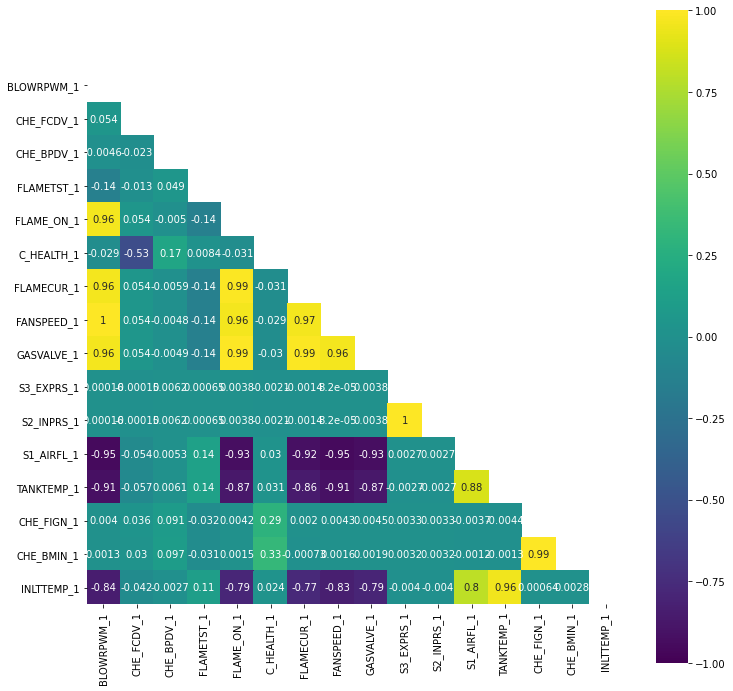

In [130]:
plt.figure(figsize=(12, 12))
mask = np.zeros_like(df_numeric.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_numeric.corr(), mask = mask, square = True, cmap = 'viridis', annot = True, vmin=-1, vmax=1);


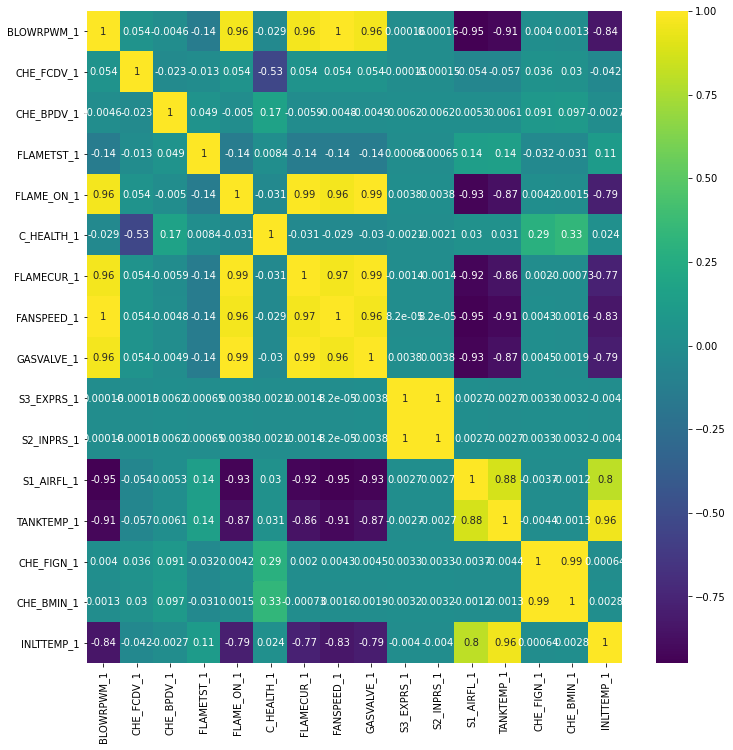

In [125]:
plt.figure(figsize=(12,12))

sns.heatmap(df_numeric.corr(), annot=True, cmap='viridis');

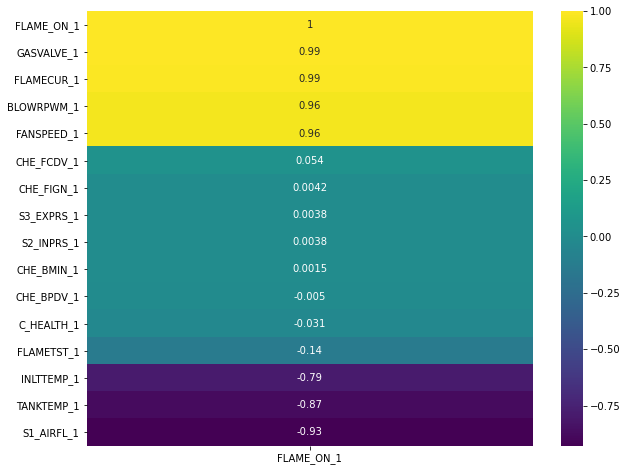

In [126]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,8))

sns.heatmap(df_numeric.corr()[['FLAME_ON_1']].sort_values('FLAME_ON_1', ascending=False), annot=True, cmap='viridis');

In [ ]:
#Scatter plot to see relation between CHE_FIGN and FLAMECUR
df3.plot(kind='scatter', x = 'CHE_FIGN', y='FLAMECUR');

In [ ]:
#Scatter plot to see relation between CHE_FIGN and FLAMECUR
df3.plot(kind='scatter', x = 'CHE_FIGN', y='AND2CURR');

In [ ]:
#Scatter plot to see relation between CHE_FIGN and FLAMECUR
#df3.plot(kind='scatter', x = 'CHE_FIGN', y='WHTRSETP');

In [ ]:
#Scatter plot to see relation between CHE_FIGN and FLAMECUR
#df3.plot(kind='scatter', x = 'CHE_FIGN', y='Date/Time');

In [ ]:
#Scatter plot to see relation between CHE_FIGN and CHE_SIGN
df3.plot(kind='scatter', x = 'CHE_FIGN', y='CHE_SIGN');

In [ ]:
#Scatter plot to see relation between CHE_FIGN and T_HEALTH
df3.plot(kind='scatter', x = 'CHE_FIGN', y='T_HEALTH');

In [ ]:
df3['T_HEALTH'].hist()

In [ ]:
#Scatter plot to see relation between CHE_FIGN and C_HEALTH
df3.plot(kind='scatter', x = 'CHE_FIGN', y='C_HEALTH');

In [ ]:
df3['C_HEALTH'].hist()

In [ ]:
#Scatter plot to see relation between CHE_FIGN and CHE_BMIN
df3.plot(kind='scatter', x = 'CHE_FIGN', y='CHE_BMIN');

In [ ]:
#selct and drop any columns
# features = ['column1', 'column2']
#df1_columns = df1[features]
#df1_final = df_final['CHE_FIGN']
#df1_final = df_final.drop(columns=['CHE_FIGN', 'CHE_FIGN'])

In [ ]:
#creating dataframe df2 of "NL I10"
df4 = pd.read_csv("./clean-anes/NL I10.csv")

In [ ]:
#readong first 5 rows of "NL I10"
df4.head()

In [ ]:
# looking at null values and data types of each column for "NL I09"
df4.info()